# Analysing output files
#### These files need to be generated for the main simulation. 

This part of the tutorial guides the users how to calculate global Fst and F* (our notation for a pairwise divergence statistic) from the outputs, which are within and between deme coalescence times.



In [1]:
time_files='Examples/StaticPopulattionsMig0/OUTPUT_DIR/CoalTimes'
demography_file='Examples/StaticPopulattionsMig0/example_static_static_N_0.23529.txt'
sample_file='Examples/StaticPopulattionsMig0/example_static_sample_list.txt'
rows=10  # specify the number of rows that were used to run the simulation
file_number=10 # specify the number of output files that you want to analyse. Files from 0 to the specified number will be analyzed. 




In [2]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning) 

def get_mean_times(file_name, n):  #it can take some time
    
    this_data=np.loadtxt(file_name+'1.txt')
    dimension=np.size(this_data,0)
    all_data=np.zeros([dimension,dimension])
    file_count=0
    for i in range(1,n+1):
        this_file_name=(file_name+str(i)+'.txt')
        my_file = Path(this_file_name)
        if my_file.exists():
            file_count=file_count+1
            this_file_data=np.loadtxt(this_file_name)
            all_data=all_data+this_file_data
        else:
            print ('The file', this_file_name, ' does not exists for ', i)
    
    mean_data=all_data/(file_count+0.0)
    np.savetxt(file_name+'MEAN.txt', mean_data)
    return mean_data

def get_mean_partial_times(mean_coal_times):
    sample_num=np.shape(mean_coal_times)
    sample_num=sample_num[0]

    mean_total_time=(np.sum(mean_coal_times)+np.sum(mean_coal_times.diagonal()))/(sample_num*(sample_num+1))
    mean_within=np.mean(mean_coal_times.diagonal())
    mean_between=(np.sum(mean_coal_times)-np.sum(mean_coal_times.diagonal()))/(sample_num*(sample_num-1))
    print ('mean total', mean_total_time)
    print ('mean within', mean_within)
    print ('mean between', mean_between)
    return(mean_total_time, mean_within, mean_between)


def plot_within_ctime(my_samples, cols, rows, mean_coal_times):
    ## this function plots within-deme coalescence time that can serve as a proxy for diversity
    
    ctime_map=np.zeros([cols*rows])
    for i in range (len(my_samples)):
        ctime_map[(my_samples[i])]=mean_coal_times[i,i]
    
    ctime_map_2D=np.reshape(ctime_map,[rows, int(map_size/rows)])
    plt.pcolor(ctime_map_2D, cmap='hot')
    print (ctime_map_2D)
    plt.colorbar()
    plt.title('Mean within deme coalescence time')
    plt.show()
    

def calculate_fst(total_time, within_time):
    Fst=(total_time-within_time)/total_time
    return(Fst)

def calc_distance_matrix(rows, cols):
    distance_matrix=np.zeros([rows*cols, rows*cols])
    for i in range(rows*cols):
        for j in range(i, rows*cols):
            distance_matrix[i,j]=(abs(j//cols-i//cols) + abs(i%cols-j%cols))
            distance_matrix[j,i]=(abs(j//cols-i//cols) + abs(i%cols-j%cols))
    return(distance_matrix)
    
def make_ibd_plots(samples, mean_coal_times, rows, cols):
    distance_matrix=calc_distance_matrix(rows, cols)
    dist_classes = [[] for i in range (rows+cols)]    
    for i in range(len(samples)):
        for j in range(i, len(samples)):
            this_dist=int(distance_matrix[int(samples[i]), int(samples[j])])
            dist_classes[this_dist].append(mean_coal_times[i,j])
    plt.boxplot(dist_classes, showmeans=True)
    plt.xlabel('manhattan distance')
    plt.ylabel('coalescence time')
    plt.title('Isolation by distance')
    plt.show()
    box_means = [np.mean(x) for x in dist_classes]

    return(box_means)
    

In [3]:
my_demography=np.loadtxt(demography_file)
my_samples=np.loadtxt(sample_file) 
my_samples=my_samples.astype(int)
mean_coal_times=get_mean_times(time_files, file_number)


OSError: Examples/Splatche1/OUTPUT_DIR/CoalTimes1.txt not found.

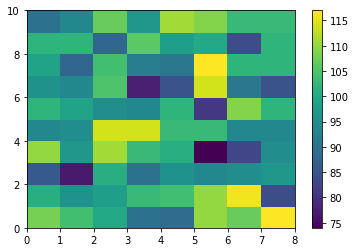

mean total 101.66386269382363
mean within 99.53810560810398
mean between 101.7728758777067
101.66386269382363 99.53810560810398 101.7728758777067
[[0.00000000e+00 1.03381254e+02 1.03381254e+02 0.00000000e+00
  1.00323720e+02 1.02308668e+02 0.00000000e+00 2.67667037e-02]
 [0.00000000e+00 1.00263221e+02 1.03381254e+02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.03381254e+02]
 [0.00000000e+00 0.00000000e+00 1.03381254e+02 1.03381254e+02
  1.03381254e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00547847e+02 1.00547847e+02 0.00000000e+00 1.00043471e+02
  1.00797477e+02 1.00466928e+02 0.00000000e+00 1.03381254e+02]
 [1.03381254e+02 0.00000000e+00 1.03381254e+02 1.03381254e+02
  0.00000000e+00 1.02308668e+02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.03381254e+02 1.00323720e+02 0.00000000e+00
  1.00087789e+02 0.00000000e+00 0.00000000e+00 1.03381254e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.02308668e+02 1.03381254e+02 1.03381254

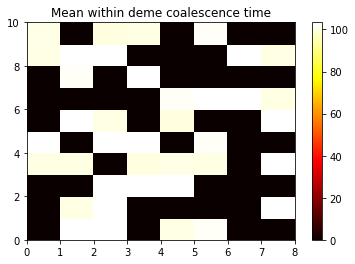

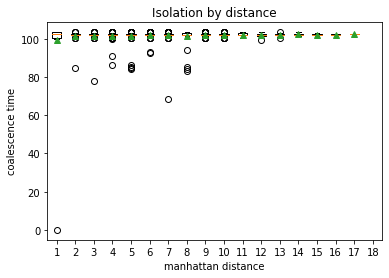

Mean total coalescence time 101.66386269382363
Mean within deme coalescence time 99.53810560810398
Mean between deme coalescence time 101.7728758777067
Fst 0.020909662778815518
Mean times in distance classes [99.53810560810398, 101.44915249158144, 101.56923615694592, 101.64135764478512, 101.33474255988423, 101.98800391829145, 101.79501377345773, 101.52908105538157, 102.06227418253383, 102.0269618979719, 102.19138298746691, 101.85931229489428, 101.96928135010864, 102.2140622932343, 102.05306114125715, 102.14498460216825, 102.30866796702368, nan]


In [59]:
[T,map_size]=np.shape(my_demography)
cols=int(map_size/rows)

final_map_2D=np.reshape(my_demography[-1,:], [rows, cols])
plt.pcolor(final_map_2D)
plt.colorbar()
plt.show()

[mean_total, mean_within, mean_between] = get_mean_partial_times(mean_coal_times) 
print (mean_total, mean_within, mean_between)
my_fst=calculate_fst(mean_total, mean_within)
plot_within_ctime(my_samples,cols, rows, mean_coal_times)
box_means=make_ibd_plots(my_samples, mean_coal_times, rows, cols)

print ('Mean total coalescence time', mean_total)
print ('Mean within deme coalescence time', mean_within)
print ('Mean between deme coalescence time', mean_between)
print ('Fst', my_fst)
print ('Mean times in distance classes', box_means)
